# AGH Modelling of Physical Systems Lab 1 (2025 March 4th)
Sylwester Arabas (sylwester.arabas@agh.edu.pl)

## 1. dimensional analysis of Python code with [pint](https://pint.readthedocs.io/)

In [1]:
import pint
from scipy import constants

In [2]:
si = pint.UnitRegistry()

In [3]:
def rho(p, R, T):
    """ ideal gas law (R: specific gas constant) """
    return p / (R*T)

R_str = constants.R * si.joule / si.kelvin / si.mole
Md = 28.966 * si.gram / si.mole
"""
A "twenty-first century" value of dry-air molar mass recommended in
[Gatley et al. 2008](https://doi.org/10.1080/10789669.2008.10391032)
"""

rho_air = rho(
    p=1000 * si.hPa,
    R=R_str / Md,
    T=300 * si.K
)

print(f"{rho_air.to_base_units():.3g} = {rho_air.to(si.g / si.cm**3):.3g}\n")

1.16 kilogram / meter ** 3 = 0.00116 gram / centimeter ** 3



In [4]:
buggy_rho = rho(
    p=1000 * si.hPa,
    R=R_str * Md,
    T=300 * si.K
)
buggy_rho.check("[density]")

False

In [5]:
# try this:
# Md + R_str

## 2. plotting with units using pint & matplotlib

In [6]:
def equilibrium_vapour_pressure(T):
    """ Teten's formula (https://en.wikipedia.org/wiki/Tetens_equation) """
    TC = T - constants.zero_Celsius * si.K
    return .61078 * si.kPa * np.exp(17.27 * TC / (237.3 * si.K + TC))

In [7]:
import numpy as np
from matplotlib import pyplot
from open_atmos_jupyter_utils import show_plot
si.setup_matplotlib()

In [8]:
def plot(fig):
    T = np.linspace(280, 320) * si.K
    fig.gca().plot(T, equilibrium_vapour_pressure(T), label='equilibrium vapour pressure')
    fig.legend()
    fig.gca().grid()

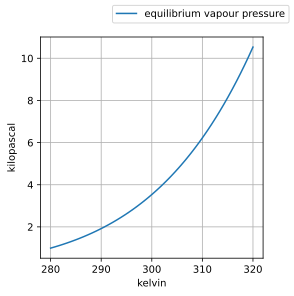

In [9]:
fig = pyplot.figure(figsize=(4,4))
plot(fig)
show_plot(fig=fig)

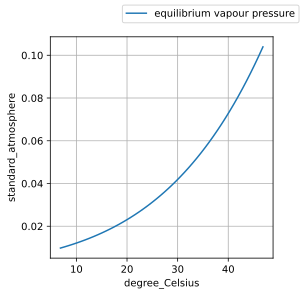

In [10]:
fig = pyplot.figure(figsize=(4,4))
plot(fig)
fig.gca().xaxis.set_units(si.celsius)
fig.gca().yaxis.set_units(si.atm)
show_plot(fig=fig)

## 3. finding boiling point of water for a given temperature 

In [11]:
def bisect(*, fun, x_min, x_max, atol):
    """ https://en.wikipedia.org/wiki/Bisection_method """ 
    fmin, fmax = fun(x_min), fun(x_max)
    while True:
        mid = (x_min + x_max) / 2 
        if abs(x_max - x_min) <= atol:
            break
        fmid = fun(mid)
        if (fmid * fmin > 0): 
            x_min, fmin = mid, fmid
        else:
            x_max, fmax = mid, fmid
    return mid 

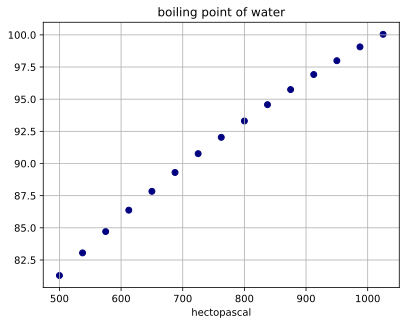

In [12]:
pyplot.gca().yaxis.set_units(si.celsius)
pyplot.title('boiling point of water')
for p_atm in np.linspace(500, 1025, 15) * si.hPa:
    T_boil = bisect(
        fun=lambda T: equilibrium_vapour_pressure(T) - p_atm,
        x_min=300 * si.K,
        x_max=400 * si.K,
        atol=.1 * si.K
    )
    pyplot.scatter(p_atm, T_boil, color='navy')
pyplot.grid()
show_plot()